# Prueba Módulo de Machine Learning: 
# Analizando los crímenes en la ciudad de Nueva York

#### Alumnos: 
- Cristian Gómez-Loaiza
- Guillermo Errázuriz

## Preliminares



### Problema


Se tienen datos sobre las interrogaciones y detenciones realizadas por el departamento de policía de la ciudad de Nueva York en los años 2009 y 2010. Se quiere ver si es posible utilizar esta información para predecir si un procedimiento terminará en arresto, y si el policía cometerá alguna acción violenta.



### Objetivo


El objetivo de este trabajo es desarrollar dos modelos de clasificación binaria. Uno para determinar si un procedimiento policial concluirá o no en un arresto, y el otro para predecir si en el procedimiento existirá o no alguna acción violenta por parte del policía.



### Metodología


__1. Importación de librerías, funciones y data frame.__


__2. Análisis exploratorio de los datos:__

Dada la gran cantidad de atributos, se hará una primera revisión básica en donde se descartarán aquellos que no parezcan útiles o que presenten algún problema muy obvio. Se contabilizarán los datos perdidos, y se analizará visualmente el vector objetivo. Luego se considerará estudiar en detalle las variables más importantes que puedan influir en el vector objetivo. 


__3. Modelación:__

Teniendo en cuenta los atributos seleccionados, se utilizarán los datos del año 2009 como el conjunto de entrenamiento, y los del 2010 como el de test. Se buscará implementar un modelo simple, para establecer una métrica de base, con la cual poder comparar la aplicación de modelos más complejos con GridSearch, a fin de poder establecer si hay mejoras en el desempeño predictivo. En cuanto a los modelos de clasificación a utilizar, serán los siguientes:

**`Logistic Regresion`**: Este será el primer modelo a implementar, debido a que es simple y eficiente. No requiere de ajustes y es fácil de interpretar.

* C: [1, 10, 100, 1000, 10000]
* class_weight: [None, 'balanced'],

**`AdaBoostClassifier`**: Es un modelo que es bueno "out of the box". Presenta muy buenos resultados sin muchos ajustes.

* Learning_rate: [0.01, 0.1,0.5]
* n_estimators: [50, 100, 500, 1000, 2000],

**`SVM`**: Las máquinas de soporte vectorial funcionan muy bien en casos en que hay pocos registros pero la dimensionalidad es alta, por lo que se sospecha que comparativamente funcione bastante bien con este dataset.

* C: [1, 10, 100, 1000, 10000]
* Gamma: [0.0001, 0.001, 0.01, 0.1, 1]

**`RandomForestClassifier`**: Este modelo es robusto y con un gran costo de implementación debido a los ensamblajes, pero una de sus mejores características es que reduce el overfitting, lo cual lo hace más preciso al momento de aplicarlo a nuevos datos. 

* max_depth : [16, 32, 64, 128, 256]
* n_estimators : [50, 100, 250, 500, 750, 1000]

**`GradientBoostingClassifier`**: Es un modelo que posee diferentes hiperparámetros para manejar. Al ser un algoritmo de ensamble, implementará arboles de desición de manera secuencial.

* Learning_rate: [0.01, 0.1,0.5]
* n_estimators: [50, 100, 500, 1000, 2000],
* subsample: [0.1,0.5,0.9]}

Durante el modelamiento se podría considerar modifcar otros parámetros como: max_depth o min_samples_leaf.


### Métricas de evaluación

Para poder identificar los modelos con mejor desempeño, dado que se trata de problemas de clasificación binaria, se procederá a utilizar las métricas Accuracy, Precision, Recall, y ROC AUC Score.

## Aspectos Computacionales

En cuanto a las librerías a utilizar y las principales funciones que cumplirán, los detalles son los siguientes:

- **`matplotlib`**: generación de gráficos (versión a utilizar: 3.1.3).

- **`numpy`**: operación con vectores (versión a utilizar: 1.18.1).

- **`pandas`**: depende de numpy, es una librería que permitirá estructurar los datos (versión a utilizar: 1.0.1).
 
- **`python`**: lenguaje de programación de alto nivel, con el cual se manipularan los datos (versión a utilizar: 3.7.6).

- **`scipy`**: módulos que nos permitirán optimizar el analisis de los datos, mediante herramientas y algoritmos matemáticos (versión a utilizar: 1.4.1).

- **`scikit-learn`**: biblioteca donde se encuentran almacenados los modelos de aprendizaje automático, y las herramientas para generar métricas de evaluación (versión a utilizar: 0.22.1).

- **`seaborn`**: librería que se construye en base a matplotlib, con el fin de facilitar la generación de la visualización de los datos (versión a utilizar: 0.10.0).

- **`missingno`**: visualización de valores perdidos (versión a utilizar: 0.4.2).

- **`joblib`**: guardar modelos serializados (versión a utilizar: 0.13.2).

## __1. Importación de librerías, funciones y data frame.__

In [267]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import missingno as msno
from joblib import dump, load

import warnings

warnings.filterwarnings('ignore')

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=(10, 5)
plt.rcParams["axes.labelsize"] = 15

In [2]:
df_train = pd.read_csv("2009_1perc.csv", index_col = 0)

In [3]:
df_test = pd.read_csv("2010_1perc.csv", index_col = 0)

## __2. Análisis exploratorio de los datos e ingeniería de atributos__

In [4]:
df_train.shape

(5812, 111)

In [5]:
df_test.shape

(6013, 111)

In [6]:
df_train.columns == df_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [7]:
df_train.head(5)

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
178048,2009,41,1779,4032009,130,A,O,P,1.0,CPW,...,,41,G,7,,1013067,0238633,CM,1,20
498873,2009,108,5805,10292009,1050,A,O,P,3.0,BURG,...,,108,J,,,1012043,0212157,CM,1,14
463573,2009,43,8340,10062009,1450,1,O,P,1.0,MISD,...,,43,E,,,1017599,0240200,CM,1,20
43626,2009,77,932,1232009,1843,A,O,P,5.0,MIS,...,,77,J,4,35,1002625,0183442,CM,1,24
563921,2009,110,11224,12132009,1655,A,O,P,3.0,CPW,...,,110,H,,,1024535,0209890,CM,1,20


In [8]:
df_train.describe()

,year,pct,ser_num,datestop,timestop,perobs,perstop,compyear,comppct,repcmd,revcmd,dob,age,ht_feet,ht_inch,weight,addrpct,linecm,detailcm
count,5812.0,5812.000000,5812.000000,5.812000e+03,5812.000000,5812.000000,5812.000000,5812.0,5812.0,5812.000000,5812.000000,5.812000e+03,5812.000000,5812.000000,5812.000000,5812.000000,5812.000000,5812.0,5812.000000
mean,2009.0,69.051617,5769.119924,6.255350e+06,1426.219202,2.665893,5.501893,0.0,0.0,252.115795,249.074845,6.941142e+06,28.874054,5.188231,6.414315,169.942533,69.051617,1.0,37.488644
std,0.0,32.846903,5524.955522,3.447243e+06,736.239726,4.816704,5.922592,0.0,0.0,305.058678,306.222306,3.552806e+06,26.067172,0.402213,3.446479,37.653637,32.846903,0.0,25.059538
min,2009.0,1.000000,1.000000,1.012009e+06,0.000000,0.000000,1.000000,0.0,0.0,1.000000,1.000000,1.011900e+06,1.000000,3.000000,0.000000,1.000000,1.000000,1.0,6.000000
25%,2009.0,42.000000,1902.750000,3.172009e+06,1030.000000,1.000000,3.000000,0.0,0.0,70.000000,67.000000,4.061986e+06,19.000000,5.000000,4.000000,150.000000,42.000000,1.0,20.000000
50%,2009.0,73.000000,4347.000000,6.142009e+06,1605.000000,1.000000,5.000000,0.0,0.0,105.000000,103.000000,7.121980e+06,25.000000,5.000000,7.000000,170.000000,73.000000,1.0,28.000000
75%,2009.0,102.000000,7616.750000,9.192009e+06,2035.000000,3.000000,5.000000,0.0,0.0,178.000000,178.750000,1.012198e+07,34.000000,5.000000,9.000000,180.000000,102.000000,1.0,46.000000
max,2009.0,123.000000,31694.000000,1.231201e+07,2830.000000,200.000000,200.000000,0.0,0.0,879.000000,879.000000,1.231199e+07,999.000000,7.000000,11.000000,999.000000,123.000000,1.0,113.000000


In [9]:
df_test.describe()

,year,pct,ser_num,datestop,timestop,perobs,perstop,compyear,comppct,repcmd,revcmd,dob,age,ht_feet,ht_inch,weight
count,6013.0,6013.000000,6013.000000,6.013000e+03,6013.000000,6013.000000,6013.000000,6013.0,6013.0,6013.000000,6013.000000,6.013000e+03,6013.000000,6013.000000,6013.000000,6013.000000
mean,2010.0,68.213870,5629.246300,6.469452e+06,1401.649426,2.643273,5.792283,0.0,0.0,234.886912,229.235157,7.678712e+06,29.059870,5.178613,6.401962,170.239647
std,0.0,33.218863,4764.331369,3.408437e+06,752.702505,12.840711,12.383224,0.0,0.0,290.362984,292.338809,3.857909e+06,31.948786,0.395452,3.365698,36.750557
min,2010.0,1.000000,1.000000,1.012010e+06,0.000000,0.000000,1.000000,0.0,0.0,1.000000,1.000000,1.011900e+06,1.000000,3.000000,0.000000,1.000000
25%,2010.0,42.000000,2071.000000,3.302010e+06,930.000000,1.000000,3.000000,0.0,0.0,69.000000,62.000000,4.181986e+06,19.000000,5.000000,4.000000,150.000000
50%,2010.0,72.000000,4393.000000,6.182010e+06,1604.000000,1.000000,5.000000,0.0,0.0,106.000000,102.000000,8.131990e+06,24.000000,5.000000,7.000000,170.000000
75%,2010.0,102.000000,8038.000000,9.262010e+06,2035.000000,2.000000,5.000000,0.0,0.0,175.000000,173.000000,1.205197e+07,34.000000,5.000000,9.000000,180.000000
max,2010.0,123.000000,28078.000000,1.231201e+07,2359.000000,926.000000,857.000000,0.0,0.0,879.000000,879.000000,1.231200e+07,999.000000,7.000000,11.000000,999.000000


### Datos perdidos

In [10]:
df_train.isna().sum().value_counts()

0    111
dtype: int64

In [11]:
df_test.isna().sum().value_counts()

0    109
1      2
dtype: int64

In [12]:
df_test.isna().sum()[df_test.isna().sum() > 0]

premname    1
stinter     1
dtype: int64

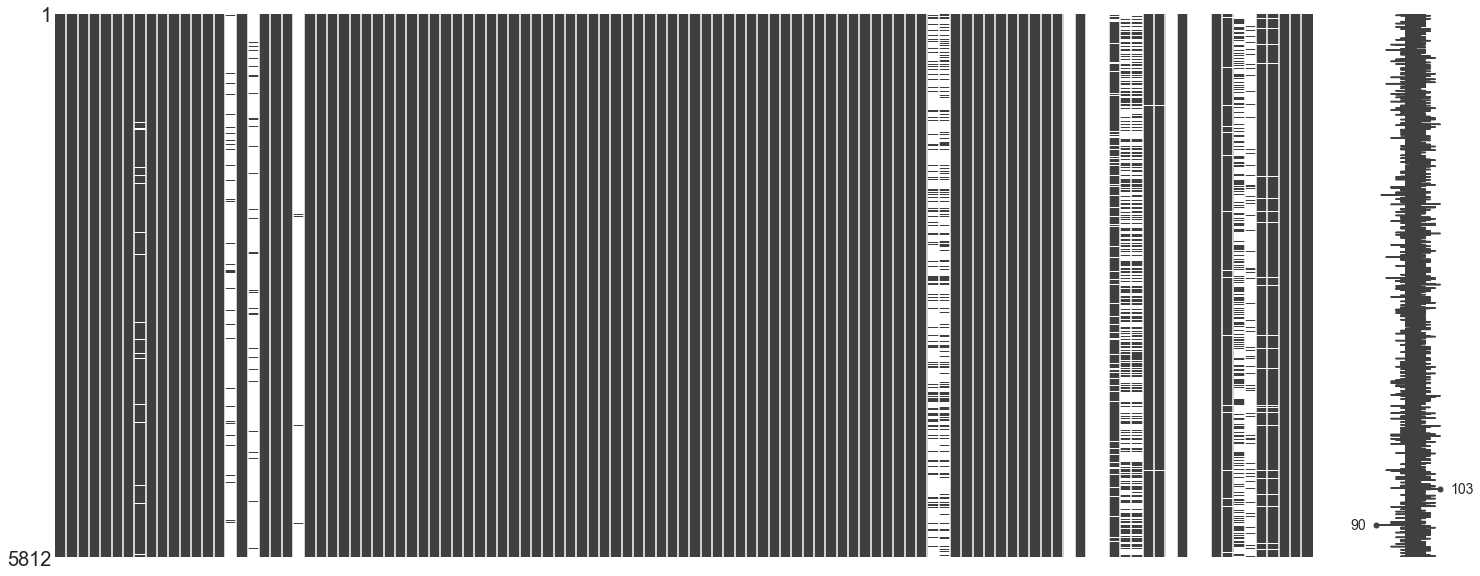

In [13]:
df_missing = df_train.replace(" ", np.nan)
msno.matrix(df_missing)

En general, los valores perdidos corresponden a columnas enteras que no tienen valores (como "zip"), o a columnas difíciles de interpretar o muy desagregadas (como la calle en que ocurrió el procedimiento), y que por lo tanto no se utilizarán.

Se hace una primera limpieza:

In [14]:
df_train.drop(columns=["year", "ser_num", "sumoffen", "compyear", "comppct", "radio", "repcmd", "revcmd", "dob",
                 "othfeatr", "addrtyp", "rescode", "premtype", "premname", "addrnum", "stname", "stinter",
                 "crossst", "aptnum", "state", "zip", "beat", "post", "xcoord", "ycoord",
                 "dettypcm", "linecm"], inplace = True)

In [15]:
df_test.drop(columns=["year", "ser_num", "sumoffen", "compyear", "comppct", "radio", "repcmd", "revcmd", "dob",
                 "othfeatr", "addrtyp", "rescode", "premtype", "premname", "addrnum", "stname", "stinter",
                 "crossst", "aptnum", "state", "zip", "beat", "post", "xcoord", "ycoord",
                 "dettypcm", "linecm"], inplace = True)

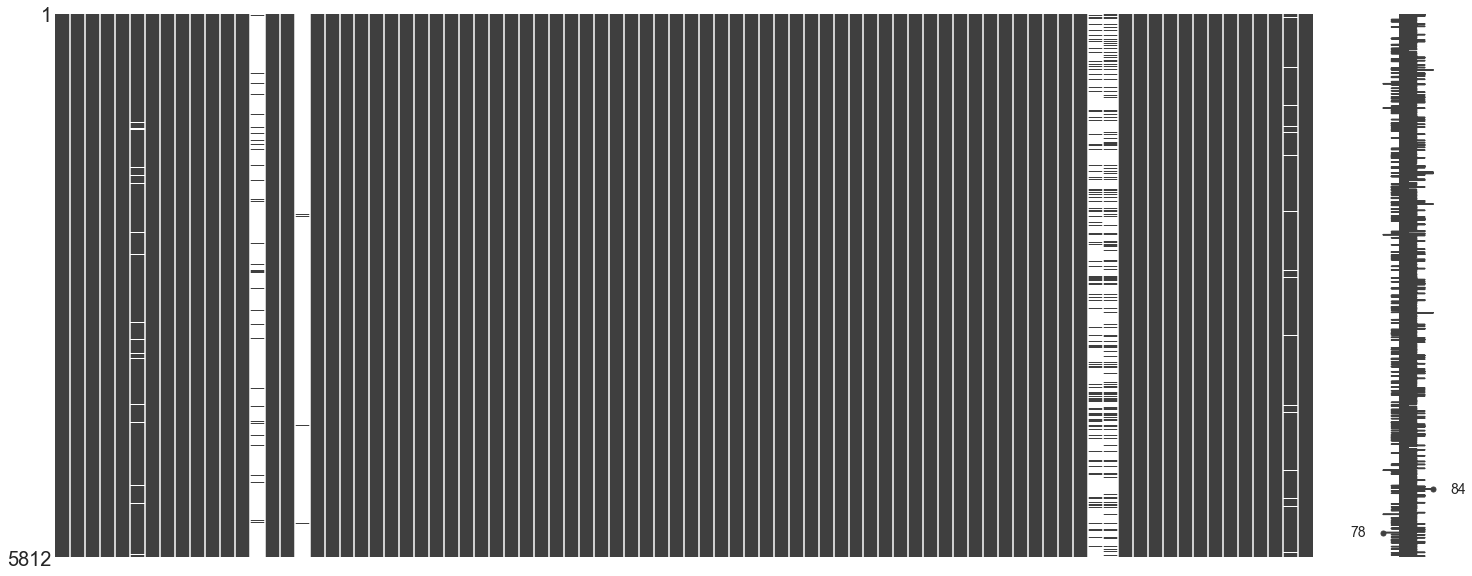

In [16]:
df_missing = df_train.replace(" ", np.nan)
msno.matrix(df_missing)

Aún quedan muchas variables que parecieran tener un gran porcentaje de valores perdidos, pero en estos casos se trata de variables en las que el espacio vacío significa una respuesta negativa. Por lo tanto, en el siguiente punto las vamos a recodificar.

### Recodificación de variables

**Cambiar de tipo int a string**

In [17]:
df_train["pct"] = df_train["pct"].astype(str)
df_test["pct"] = df_test["pct"].astype(str)

**Mes y día de la semana**

In [18]:
df_train["datestop"] = df_train["datestop"].astype(str)
df_test["datestop"] = df_test["datestop"].astype(str)

In [19]:
df_train["day"] = df_train["datestop"].str[-6:-4]
df_test["day"] = df_test["datestop"].str[-6:-4]

In [20]:
df_train["month"] = df_train["datestop"].str[-9:-6]
df_test["month"] = df_test["datestop"].str[-9:-6]

In [21]:
df_train["year"] = df_train["datestop"].str[-4:]
df_test["year"] = df_test["datestop"].str[-4:]

In [22]:
df_train["date_concat"] = df_train["year"] + "-" + df_train["month"] + "-" + df_train["day"]
df_test["date_concat"] = df_test["year"] + "-" + df_test["month"] + "-" + df_test["day"]

In [23]:
df_train["dayofweek"] = pd.to_datetime(df_train["date_concat"], format = '%Y-%m-%d').dt.dayofweek
df_test["dayofweek"] = pd.to_datetime(df_test["date_concat"], format = '%Y-%m-%d').dt.dayofweek

In [24]:
df_train.drop(columns = ["datestop", "day", "year", "date_concat"], inplace = True)
df_test.drop(columns = ["datestop", "day", "year", "date_concat"], inplace = True)

**Hora**

In [25]:
df_train["hour"] = df_train["timestop"].astype(str).str[-5:-2]
df_test["hour"] = df_test["timestop"].astype(str).str[-5:-2]

In [26]:
df_train["hour"] = np.where(df_train["hour"] == "", 0, df_train["hour"])
df_test["hour"] = np.where(df_test["hour"] == "", 0, df_test["hour"])

In [27]:
df_train.drop(index = df_train[df_train["hour"].astype(int) > 23].index, inplace = True)
df_test.drop(index = df_test[df_test["hour"].astype(int) > 23].index, inplace = True)

In [28]:
df_train.drop(columns = ["timestop"], inplace = True)
df_test.drop(columns = ["timestop"], inplace = True)

**Periodo de observación**

In [29]:
df_train["perobs_under1"] = np.where(df_train["perobs"] <= 1, 1, 0)
df_test["perobs_under1"] = np.where(df_test["perobs"] <= 1, 1, 0)

In [30]:
df_train["perobs_1to2"] = np.where(np.logical_and(df_train["perobs"] > 1, df_train["perobs"] <= 2), 1, 0)
df_test["perobs_1to2"] = np.where(np.logical_and(df_test["perobs"] > 1, df_test["perobs"] <= 2), 1, 0)

In [31]:
df_train["perobs_2to5"] = np.where(np.logical_and(df_train["perobs"] > 2, df_train["perobs"] <= 5), 1, 0)
df_test["perobs_2to5"] = np.where(np.logical_and(df_test["perobs"] > 2, df_test["perobs"] <= 5), 1, 0)

In [32]:
df_train["perobs_5plus"] = np.where(df_train["perobs"] > 5, 1, 0)
df_test["perobs_5plus"] = np.where(df_test["perobs"] > 5, 1, 0)

In [33]:
df_train.drop(columns = ["perobs"], inplace = True)
df_test.drop(columns = ["perobs"], inplace = True)

**Altura**

In [34]:
df_train["ht_ft_inch"] = df_train["ht_feet"] + df_train["ht_inch"]/12
df_test["ht_ft_inch"] = df_test["ht_feet"] + df_test["ht_inch"]/12

In [35]:
df_train.drop(columns = ["ht_feet", "ht_inch"], inplace = True)
df_test.drop(columns = ["ht_feet", "ht_inch"], inplace = True)

**Ciudad**

In [36]:
df_test["city"] = np.where(df_test["city"] == "STATEN IS", "STATEN ISLAND", df_test["city"])

In [37]:
df_test.drop(index = df_test[df_test["city"] == " "].index, inplace = True)

**Otras recodificaciones**

In [38]:
df_train["officrid"] = np.where(df_train["officrid"] == " ", "N", df_train["officrid"])
df_test["officrid"] = np.where(df_test["officrid"] == " ", "N", df_test["officrid"])

In [39]:
df_train["offverb"] = np.where(df_train["offverb"] == " ", "N", df_train["offverb"])
df_test["offverb"] = np.where(df_test["offverb"] == " ", "N", df_test["offverb"])

In [40]:
df_train["offshld"] = np.where(df_train["offshld"] == " ", "N", df_train["offshld"])
df_test["offshld"] = np.where(df_test["offshld"] == " ", "N", df_test["offshld"])

### Recodificación del vector objetivo para el modelo de arrestos

Se recodificará Y como 1 y N como 0.

In [41]:
df_train["arstmade_Y"] = np.where(df_train["arstmade"] == "Y", 1, 0)
df_test["arstmade_Y"] = np.where(df_test["arstmade"] == "Y", 1, 0)

### Comportamiento del vector objetivo para el modelo de arrestos

Text(0.5, 1.0, '¿Procedimiento termina en arresto?')

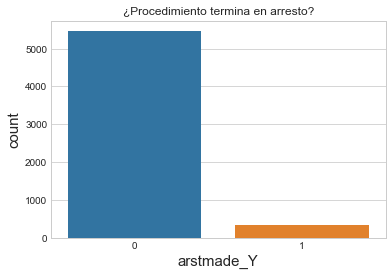

In [42]:
sns.countplot(df_train["arstmade_Y"])
plt.title("¿Procedimiento termina en arresto?")

Text(0.5, 1.0, '¿Procedimiento termina en arresto?')

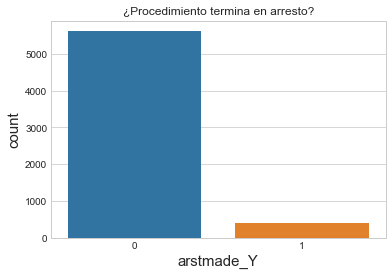

In [43]:
sns.countplot(df_test["arstmade_Y"])
plt.title("¿Procedimiento termina en arresto?")

Para ambos años se observa un importante desbalance de clases, a favor de los procedimientos que no conllevan un arresto.

In [44]:
race_name = {"B":'BLACK', "A":'ASIAN_PACIFIC_ISLANDER', "Q":'WHITE_HISPANIC', "W":'WHITE', "Z":'OTHER',
             "P":'BLACK_HISPANIC', "X":'UNKNOWN', "I":'AMERICAN_INDIAN_ALASKAN_NATIVE'}
race_train = df_train["race"].replace(race_name)
race_test = df_test["race"].replace(race_name)

In [45]:
race_order = pd.Series(race_train.unique())

Text(0.5, 1.0, '¿Procedimiento termina en arresto?')

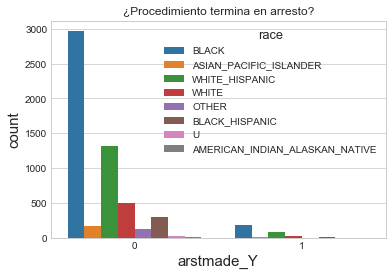

In [46]:
sns.countplot(df_train["arstmade_Y"], hue = race_train, hue_order = race_order)
plt.title("¿Procedimiento termina en arresto?")

Text(0.5, 1.0, '¿Procedimiento termina en arresto?')

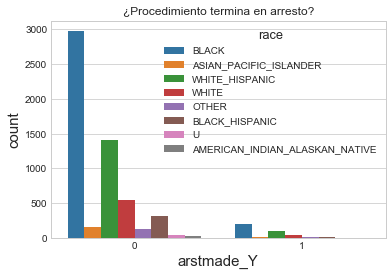

In [47]:
sns.countplot(df_test["arstmade_Y"], hue = race_test, hue_order = race_order)
plt.title("¿Procedimiento termina en arresto?")

La frecuencia de las distintas razas es relativamente similar entre los datasets.

Se observa que quienes son arrestados con mayor frecuencia son de raza negra, pero responde en gran parte a que son también quienes más participan de procedimientos policiales.

Se aclara que para este problema se utilizarán los mismos modelos que para el de acciones violentas, los cuales fueron descritos en detalle junto a los hiperparámetros en la sección de metodología.

### Recodificación del vector objetivo para el modelo de acción violenta

In [48]:
 # Se filtran las columnas que empiezan con "pf".

df_train_pf = df_train.loc[:, df_train.columns.str.startswith('pf_')]
df_test_pf = df_test.loc[:, df_test.columns.str.startswith('pf_')]

In [49]:
# Se crea una nueva columna que toma valor 1 si cualquiera de las que parten con "pf" tienen valor "Y".

df_train['pf_any'] = (df_train_pf == "Y").any(1).astype(int)
df_test['pf_any'] = (df_test_pf == "Y").any(1).astype(int)

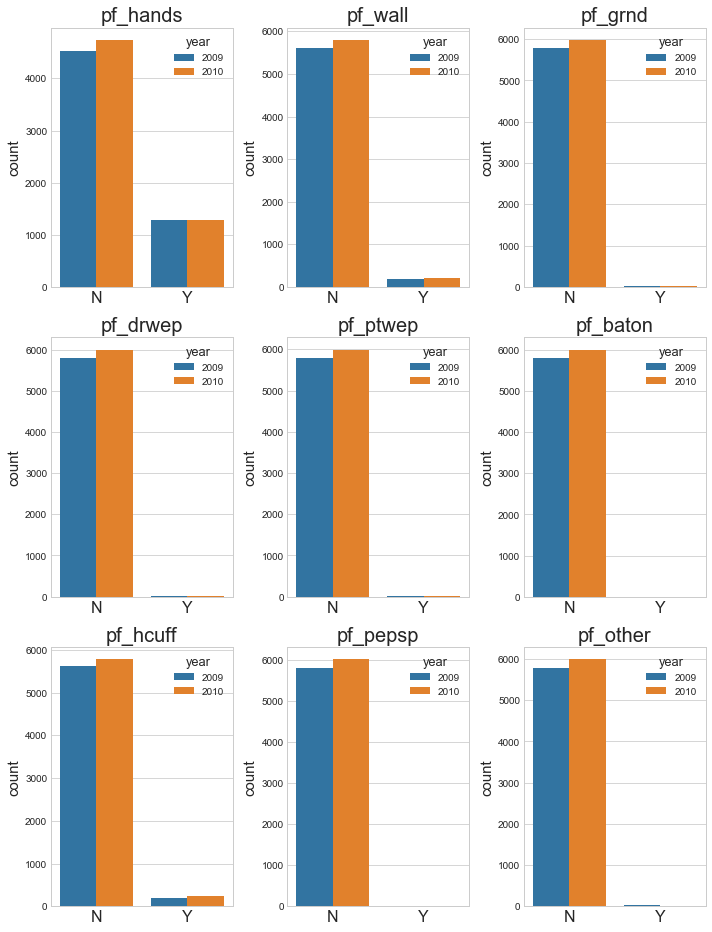

In [50]:
df_train_pf['year'] = 2009
df_test_pf['year'] = 2010
df_years = pd.concat([df_train_pf,df_test_pf],axis=0)

fig,_ = plt.subplots(figsize = (10,30))

for i, (colname,col) in enumerate (df_years.select_dtypes('O').iteritems()):
    plt.subplot(7,3,i+1)
    sns.countplot(x=df_years[colname],hue="year", data=df_years)
    plt.title(colname,fontsize=20)
    plt.xlabel("")
    plt.xticks(fontsize=16)
    plt.tight_layout()

In [51]:
df_train.drop(columns = ["pf_hands", "pf_wall", "pf_grnd", "pf_drwep", "pf_ptwep",
                         "pf_baton", "pf_hcuff", "pf_pepsp", "pf_other"], inplace = True)
df_test.drop(columns = ["pf_hands", "pf_wall", "pf_grnd", "pf_drwep", "pf_ptwep",
                         "pf_baton", "pf_hcuff", "pf_pepsp", "pf_other"], inplace = True)

De ahora en adelante, nuestro vector objetivo para saber si un procedimiento concluyó en una acción violenta, de cualquier tipo, es pf_any. Este toma valor 1 en caso afirmativo, y 0 en caso negativo.

Vemos que los tipos de violencia que componen esta variable tienen una frecuencia muy similar entre el 2009 y 2010, por lo que esta recodificación no debería significar un problema.

### Comportamiento del vector objetivo para el modelo de acción violenta

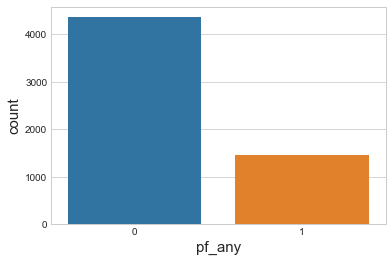

In [52]:
sns.countplot(df_train["pf_any"])

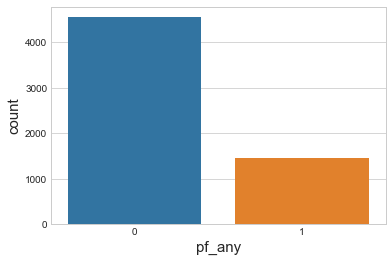

In [53]:
sns.countplot(df_test["pf_any"])

Se puede observar un ligero desbalance de clases, cargado hacia los procedimientos sin acción violenta para ambos años.

Text(0.5, 1.0, '¿Procedimiento termina en acción violenta?')

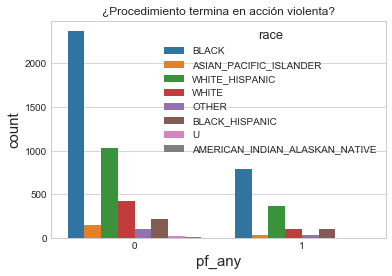

In [54]:
sns.countplot(df_train["pf_any"], hue = race_train, hue_order = race_order)
plt.title("¿Procedimiento termina en acción violenta?")

Text(0.5, 1.0, '¿Procedimiento termina en acción violenta?')

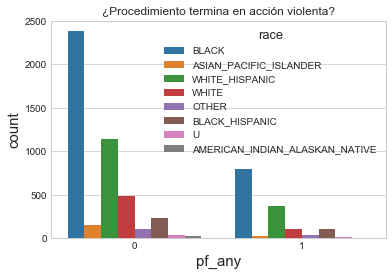

In [55]:
sns.countplot(df_test["pf_any"], hue = race_test, hue_order = race_order)
plt.title("¿Procedimiento termina en acción violenta?")

Al igual que con los arrestos, se observa que quienes son víctimas de violencia con mayor frecuencia son de raza negra, pero responde en gran parte a que son también quienes más participan de procedimientos policiales.

In [56]:
df_race = pd.get_dummies(df_train["race"])

In [57]:
df_race["arstmade_Y"] = df_train["arstmade_Y"]
df_race["pf_any"] = df_train["pf_any"]

In [58]:
df_city = pd.get_dummies(df_train["city"])

In [59]:
df_race = df_race.merge(df_city, left_index = True, right_index = True)

In [60]:
df_race["BRONX_B"] = np.where(np.logical_and(df_race["BRONX"] == 1, df_race["B"] == 1), 1, 0)
df_race["BROOKLYN_B"] = np.where(np.logical_and(df_race["BROOKLYN"] == 1, df_race["B"] == 1), 1, 0)
df_race["MANHATTAN_B"] = np.where(np.logical_and(df_race["MANHATTAN"] == 1, df_race["B"] == 1), 1, 0)
df_race["QUEENS_B"] = np.where(np.logical_and(df_race["QUEENS"] == 1, df_race["B"] == 1), 1, 0)
df_race["STATEN_ISLAND_B"] = np.where(np.logical_and(df_race["STATEN ISLAND"] == 1, df_race["B"] == 1), 1, 0)

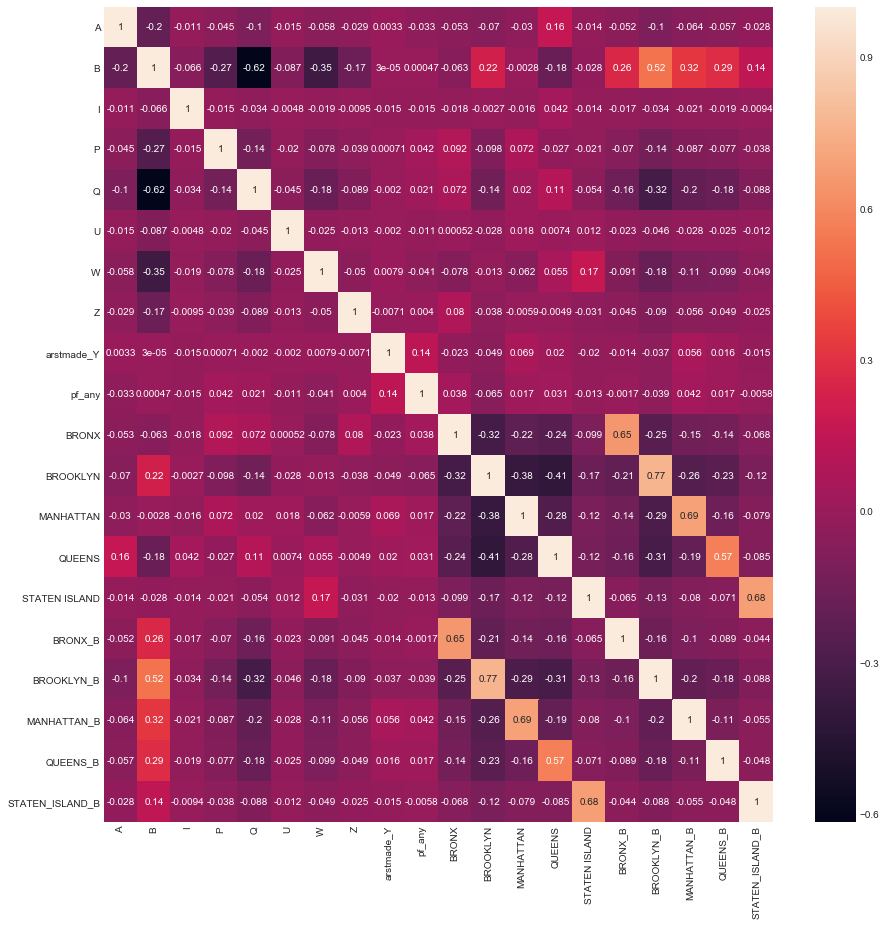

In [61]:
plt.rcParams['figure.figsize']=(15, 15)
sns.heatmap(df_race.corr(), annot = True)

Los arrestos tienen una mayor correlación positiva con Manhattan (0.069), mientras que la violencia es mayor en el Bronx (0.38). Es interesante ver que, a pesar de que la gente de raza negra es arrestada en menor proporción que el promedio en Manhattan (0.056), sufren un nivel de violencia mucho mayor (0.042, versus 0.017 promedio). 

### Eliminación de variables que no se utilizarán

Las siguientes variables se eliminan dado que presentan valores perdidos o muy sucios, o porque ya se utilizaron para crear otra variable.

In [62]:
df_train.drop(columns=["arstmade", "arstoffn", "crimsusp", "addrpct", "detailcm", "trhsloc", "asltweap"], inplace = True)
df_test.drop(columns=["arstmade", "arstoffn", "crimsusp", "addrpct", "detailcm", "trhsloc", "asltweap"], inplace = True)

In [63]:
df_train.drop(index = df_train[df_train["haircolr"] == "SN"].index, inplace = True)
df_test.drop(index = df_test[df_test["eyecolor"] == "VI"].index, inplace = True)

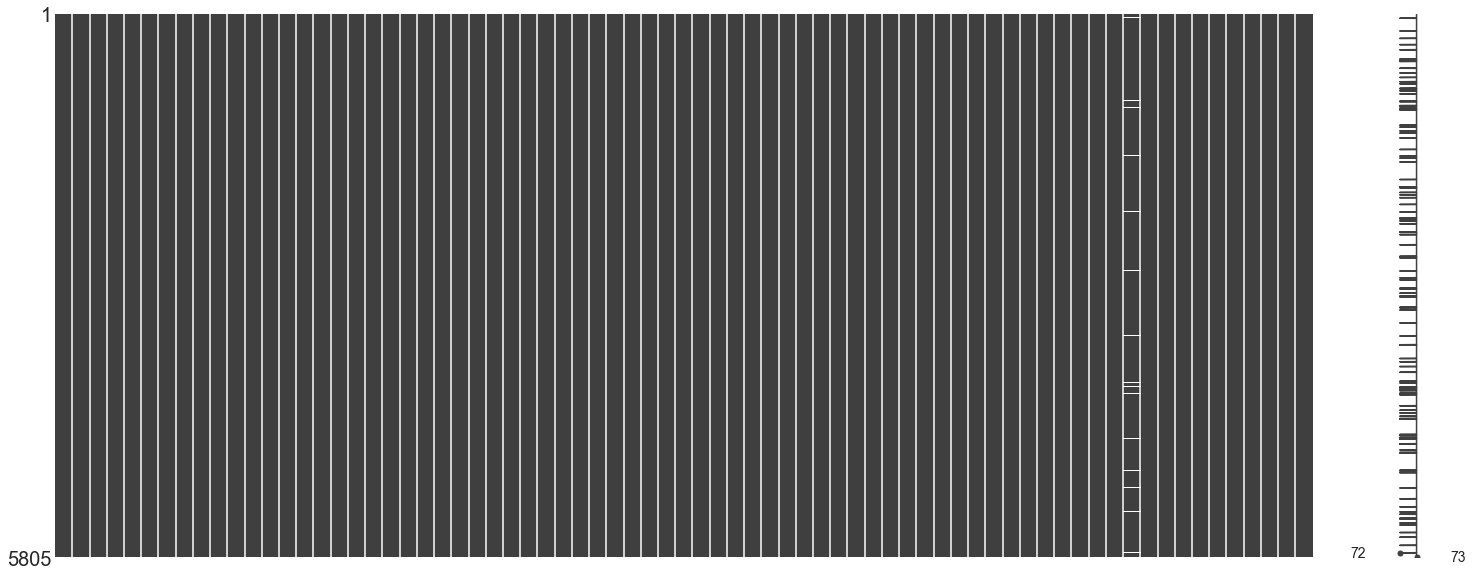

In [64]:
df_missing = df_train.replace(" ", np.nan)
msno.matrix(df_missing)

## __3. Modelación__

In [65]:
df_train.columns == df_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [66]:
set_train = set(pd.Series(pd.get_dummies(df_train.drop(columns = ["pf_any"]).dropna(), drop_first = True).columns))

In [67]:
set_test = set(pd.Series(pd.get_dummies(df_test.drop(columns = ["pf_any"]).dropna(), drop_first = True).columns))

In [68]:
set_train.difference(set_test)

set()

In [69]:
set_test.difference(set_train)

set()

### 3.1 Modelo de arrestos

In [360]:
X_train = pd.get_dummies(df_train.drop(columns = ["arstmade_Y"]).dropna(), drop_first = True)
X_test = pd.get_dummies(df_test.drop(columns = ["arstmade_Y"]).dropna(), drop_first = True)
y_train = df_train["arstmade_Y"]
y_test = df_test["arstmade_Y"]

In [361]:
# Ajustamos y aplicamos una transformación para estandarizar X_train 
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

# Aplicamos la transformación a X_test
X_test_std = scaler.transform(X_test)

In [346]:
svc = SVC(class_weight = {0: 0.26, 1: 0.64})
SVC_GS = GridSearchCV(svc,
                    param_grid = {"C": (1, 10, 100, 1000, 10000),
                                  "gamma": (0.0001, 0.001, 0.01, 0.1, 1)},
                   cv = 10, n_jobs = -1, verbose = 2)

In [347]:
#SVC_GS.fit(X_train_std, y_train)

In [348]:
#dump(SVC_GS, 'SVC_Arrestos.joblib')

In [349]:
SVC_GS_Arrestos = load('SVC_Arrestos.joblib') 

In [350]:
hm_df = pd.DataFrame(SVC_GS_Arrestos.cv_results_["params"])

In [351]:
hm_df["mean_test_score"] = SVC_GS_Arrestos.cv_results_["mean_test_score"]

In [352]:
pivoted_hm_df = hm_df.pivot(index='C', columns='gamma', values='mean_test_score')

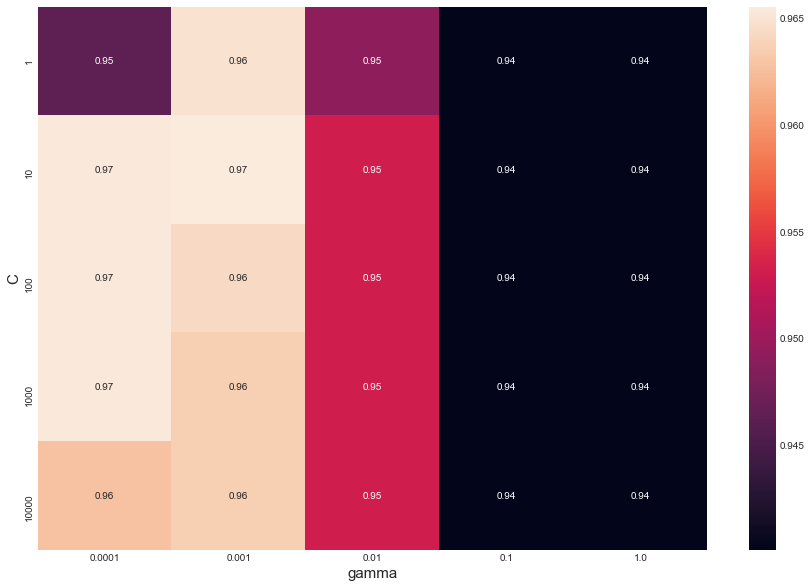

In [353]:
plt.rcParams["figure.figsize"] = (15,10)
sns.heatmap(pivoted_hm_df, annot = True)

In [354]:
yhat = SVC_GS_Arrestos.predict(X_test_std)

In [355]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5612
           1       0.79      0.61      0.68       399

    accuracy                           0.96      6011
   macro avg       0.88      0.80      0.83      6011
weighted avg       0.96      0.96      0.96      6011



In [362]:
param_grid = {"C": (1, 10, 100, 1000, 10000), "class_weight": (None, "balanced")}

In [363]:
logit = LogisticRegression()

In [370]:
logit_GS_Arrestos = GridSearchCV(logit, param_grid, cv = 10, n_jobs = -1, verbose = 2)

In [377]:
#logit_GS_Arrestos.fit(X_train_std, y_train)

In [378]:
#dump(logit_GS_Arrestos, 'logit_GS_Arrestos.joblib')

In [376]:
logit_GS_Arrestos = load('logit_GS_Arrestos.joblib') 

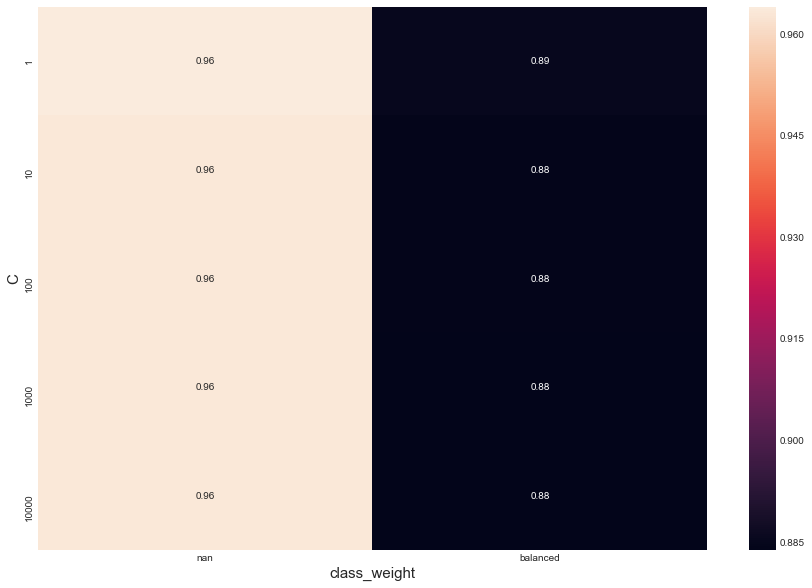

In [372]:
hm_df = pd.DataFrame(logit_GS_Arrestos.cv_results_["params"])
hm_df["mean_test_score"] = logit_GS_Arrestos.cv_results_["mean_test_score"]
pivoted_hm_df = hm_df.pivot(index='C', columns='class_weight', values='mean_test_score')
plt.rcParams["figure.figsize"] = (15,10)
sns.heatmap(pivoted_hm_df, annot = True)

In [373]:
yhat = logit_GS_Arrestos.predict(X_test_std)

In [374]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5612
           1       0.83      0.56      0.67       399

    accuracy                           0.96      6011
   macro avg       0.90      0.78      0.83      6011
weighted avg       0.96      0.96      0.96      6011



In [467]:
def plot_importance(fit_model, feat_names):
    tmp_importance = np.abs(fit_model.coef_[0])
    sort_importance = np.argsort(tmp_importance)[::-1]
    sort_importance = sort_importance[0:30]
    names = [feat_names[i] for i in sort_importance]
    plt.title("Feature importance")
    plt.barh(range(len(names)), tmp_importance[sort_importance])
    plt.yticks(range(len(names)), names, rotation=0)

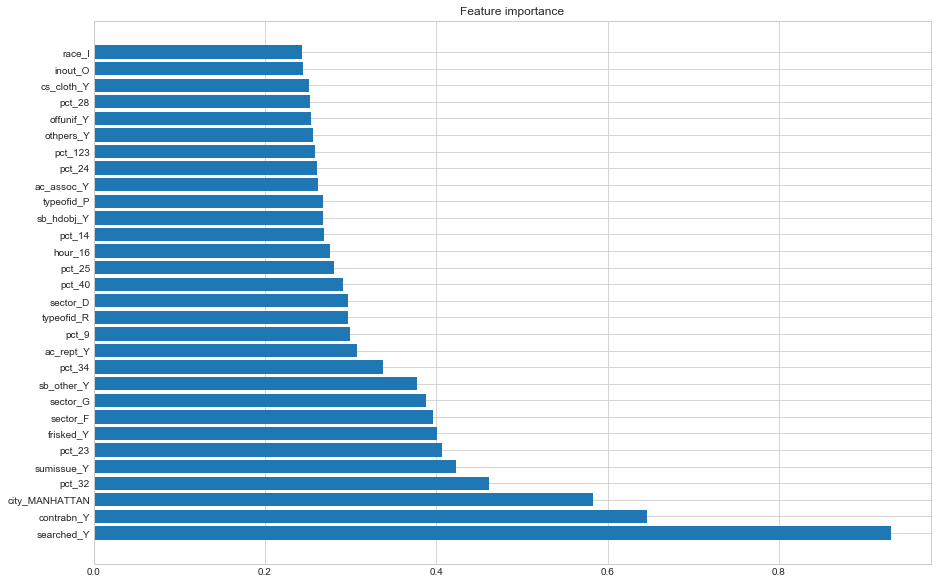

In [468]:
plot_importance(logit_GS_Arrestos.best_estimator_, X_train.columns)

In [435]:
X_test_std_M = scaler.transform(X_test.query('sex_M == 1').query('race_B == 1'))
pd.DataFrame(logit_GS_Arrestos.predict_proba(X_test_std_M))[1].mean()

0.06116287645032586

La probabilidad de que un hombre de raza negra sea arrestado en alguno de los barrios es de 6,12%.

Los dos modelos son muy similares, y ambos cumplen el benchmark. Nos quedamos con el modelo SVM por el mayor recall, dado que nos permite estar más seguros de identificar la mayor cantidad de arrestos reales.

### 3.2 Modelos de violencia

In [268]:
X_train = pd.get_dummies(df_train.drop(columns = ["pf_any"]).dropna(), drop_first = True)
X_test = pd.get_dummies(df_test.drop(columns = ["pf_any"]).dropna(), drop_first = True)
y_train = df_train["pf_any"]
y_test = df_test["pf_any"]

In [269]:
# Ajustamos y aplicamos una transformación para estandarizar X_train 
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

# Aplicamos la transformación a X_test
X_test_std = scaler.transform(X_test)

### Modelo 1 - Regresión Logística

In [270]:
param_grid = {"C": (1, 10, 100, 1000, 10000), "class_weight": (None, "balanced")}

In [271]:
logit = LogisticRegression()

In [272]:
logit_GS = GridSearchCV(logit, param_grid, cv = 10, n_jobs = -1, verbose = 2)

In [273]:
#logit_GS.fit(X_train_std, y_train)

In [274]:
#dump(logit_GS, 'logit_GS.joblib')

In [275]:
logit_GS = load('logit_GS.joblib') 

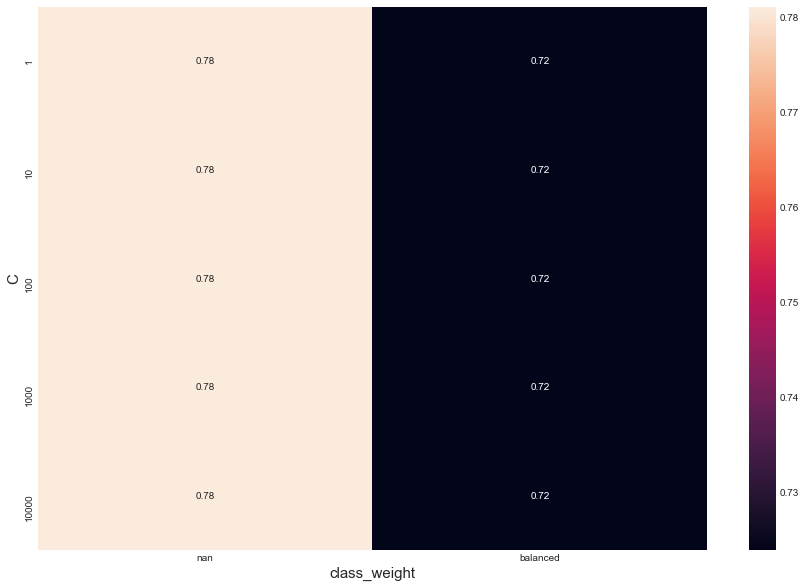

In [276]:
hm_df = pd.DataFrame(logit_GS.cv_results_["params"])
hm_df["mean_test_score"] = logit_GS.cv_results_["mean_test_score"]
pivoted_hm_df = hm_df.pivot(index='C', columns='class_weight', values='mean_test_score')
plt.rcParams["figure.figsize"] = (15,10)
sns.heatmap(pivoted_hm_df, annot = True)

In [277]:
yhat = logit_GS.predict(X_test_std)

In [278]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      4558
           1       0.56      0.44      0.49      1453

    accuracy                           0.78      6011
   macro avg       0.69      0.67      0.68      6011
weighted avg       0.77      0.78      0.77      6011



In [279]:
logit_cr = classification_report(y_test, yhat, output_dict = True)

In [283]:
logit_AUC = round(roc_auc_score(y_test, yhat), 2)

### Modelo 2 - AdaBoost

In [284]:
param_grid = {"learning_rate": (0.01, 0.1, 0.5), "n_estimators": (50, 100, 500, 1000, 2000)}

In [285]:
ada = AdaBoostClassifier()

In [286]:
AB_GS = GridSearchCV(ada, param_grid, cv = 10, n_jobs = -1, verbose = 2)

In [287]:
#AB_GS.fit(X_train_std, y_train)

In [288]:
#dump(AB_GS, 'AB.joblib')

In [289]:
AB_GS = load('AB.joblib') 

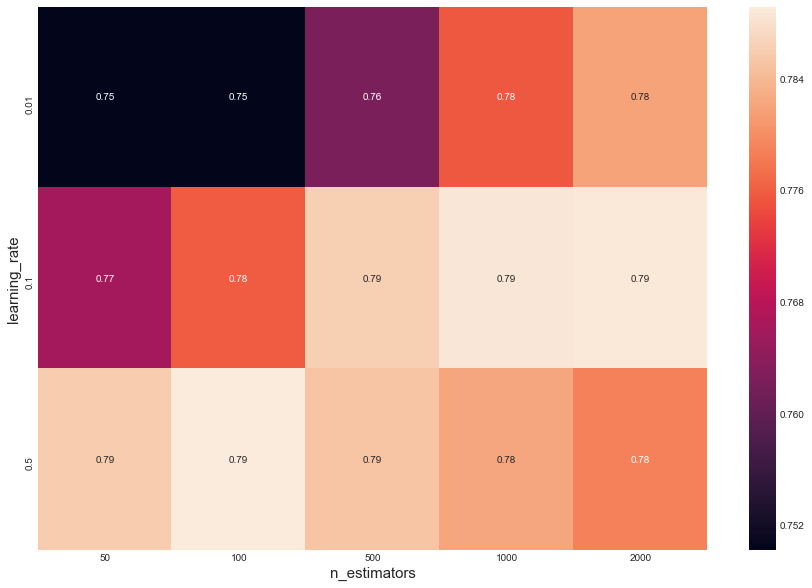

In [290]:
hm_df = pd.DataFrame(AB_GS.cv_results_["params"])
hm_df["mean_test_score"] = AB_GS.cv_results_["mean_test_score"]
pivoted_hm_df = hm_df.pivot(index='learning_rate', columns='n_estimators', values='mean_test_score')
plt.rcParams["figure.figsize"] = (15,10)
sns.heatmap(pivoted_hm_df, annot = True)

In [291]:
yhat = AB_GS.predict(X_test_std)

In [292]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      4558
           1       0.60      0.35      0.44      1453

    accuracy                           0.79      6011
   macro avg       0.71      0.64      0.66      6011
weighted avg       0.76      0.79      0.76      6011



In [293]:
ada_cr = classification_report(y_test, yhat, output_dict = True)

In [294]:
ada_AUC = round(roc_auc_score(y_test, yhat), 2)

### Modelo 3 - SVM

In [295]:
svc = SVC(class_weight = {0: 0.26, 1: 0.64})
SVC_GS = GridSearchCV(svc,
                    param_grid = {"C": (1, 10, 100, 1000, 10000),
                                  "gamma": (0.0001, 0.001, 0.01, 0.1, 1)},
                   cv = 10, n_jobs = -1, verbose = 2)

In [296]:
#SVC_GS.fit(X_train_std, y_train)

In [297]:
#dump(SVC_GS, 'SVC_Violencia.joblib')

In [298]:
SVC_GS_Violencia = load('SVC_Violencia.joblib') 

In [299]:
hm_df = pd.DataFrame(SVC_GS_Violencia.cv_results_["params"])

In [300]:
hm_df["mean_test_score"] = SVC_GS_Violencia.cv_results_["mean_test_score"]

In [301]:
pivoted_hm_df = hm_df.pivot(index='C', columns='gamma', values='mean_test_score')

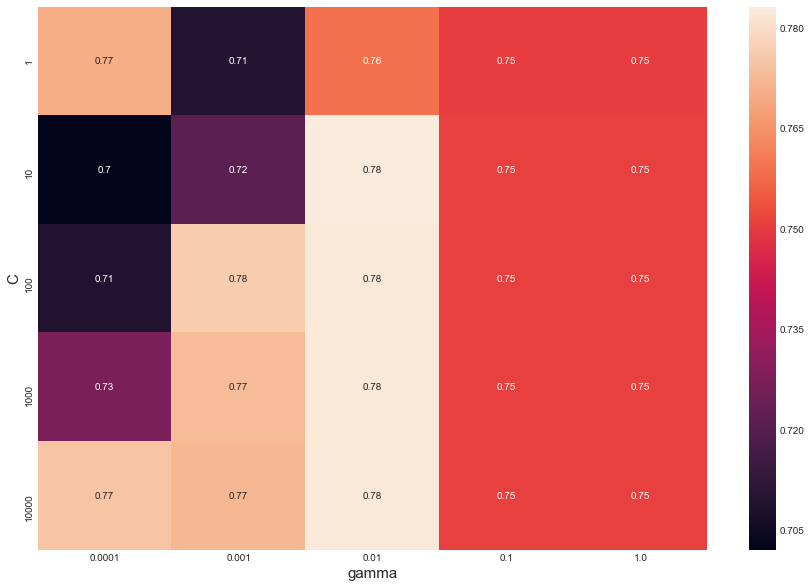

In [302]:
plt.rcParams["figure.figsize"] = (15,10)
sns.heatmap(pivoted_hm_df, annot = True)

In [303]:
yhat = SVC_GS_Violencia.predict(X_test_std)

In [304]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86      4558
           1       0.58      0.30      0.40      1453

    accuracy                           0.78      6011
   macro avg       0.69      0.62      0.63      6011
weighted avg       0.75      0.78      0.75      6011



In [305]:
SVM_cr = classification_report(y_test, yhat, output_dict = True)

In [306]:
SVM_AUC = round(roc_auc_score(y_test, yhat), 2)

### Modelo 4 - Random Forest

In [307]:
param_grid = {"max_depth": (16, 32, 64, 128, 256), "n_estimators": (50, 100, 250, 500, 750, 1000)}

In [308]:
rfc = RandomForestClassifier(max_features = "sqrt")

In [309]:
RF_GS = GridSearchCV(rfc, param_grid, cv = 10, n_jobs = -1, verbose = 2)

In [310]:
#RF_GS.fit(X_train_std, y_train)

In [311]:
#dump(RF_GS, 'RF.joblib')

In [312]:
RF_GS = load('RF.joblib') 

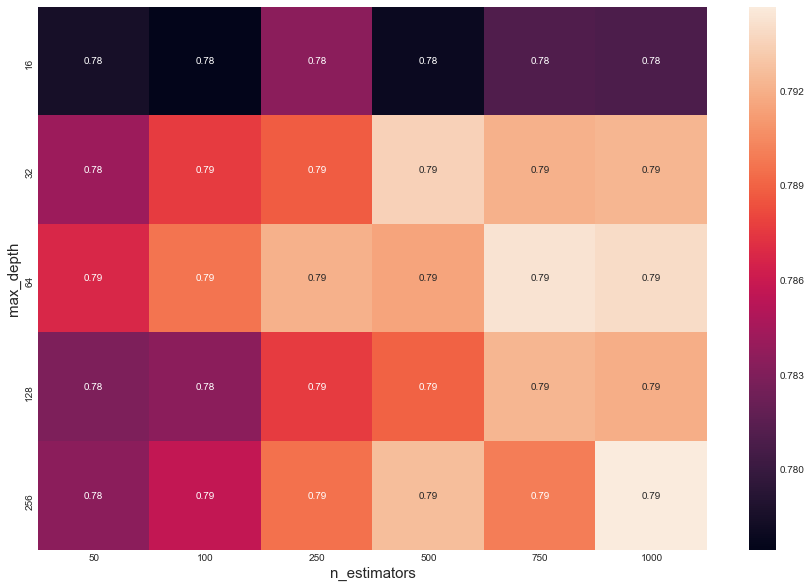

In [313]:
hm_df = pd.DataFrame(RF_GS.cv_results_["params"])
hm_df["mean_test_score"] = RF_GS.cv_results_["mean_test_score"]
pivoted_hm_df = hm_df.pivot(index='max_depth', columns='n_estimators', values='mean_test_score')
plt.rcParams["figure.figsize"] = (15,10)
sns.heatmap(pivoted_hm_df, annot = True)

In [314]:
yhat = RF_GS.predict(X_test_std)

In [315]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      4558
           1       0.65      0.24      0.35      1453

    accuracy                           0.79      6011
   macro avg       0.73      0.60      0.61      6011
weighted avg       0.76      0.79      0.75      6011



In [316]:
RF_cr = classification_report(y_test, yhat, output_dict = True)

In [317]:
RF_AUC = round(roc_auc_score(y_test, yhat), 2)

### Modelo 5 - Gradient Boosting

In [318]:
param_grid = {"learning_rate": (0.01, 0.1, 0.5), "n_estimators": (50, 100, 500, 1000, 2000), "subsample": (0.1, 0.5, 0.9)}

In [319]:
gb = GradientBoostingClassifier()

In [320]:
GB_GS = GridSearchCV(gb, param_grid, cv = 5, n_jobs = -1, verbose = 2)

In [321]:
#GB_GS.fit(X_train_std, y_train)

In [322]:
#dump(GB_GS, 'GB.joblib')

In [323]:
GB_GS = load('GB.joblib') 

Text(0.5, 1, 'Subsample = 0.1')

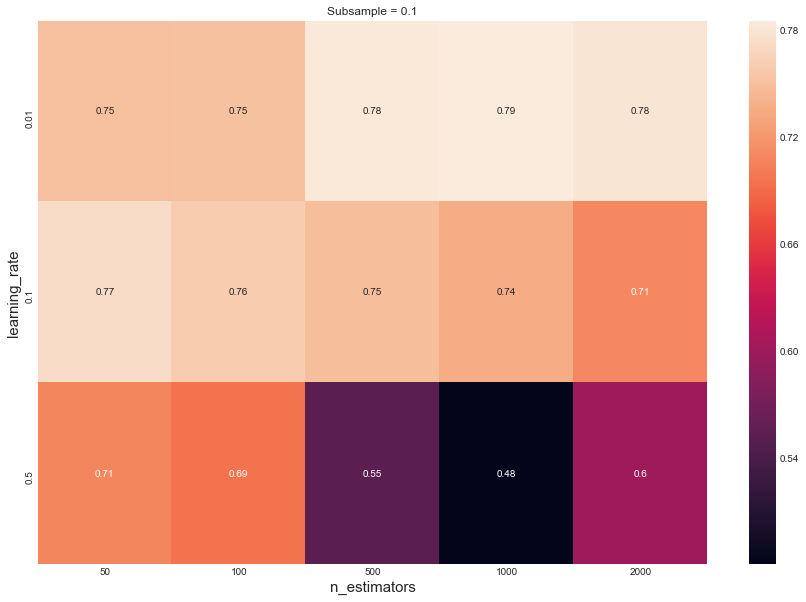

In [324]:
hm_df = pd.DataFrame(GB_GS.cv_results_["params"])
hm_df["mean_test_score"] = GB_GS.cv_results_["mean_test_score"]

hm_df_d1 = hm_df.query('subsample == 0.1')
pivoted_hm_df = hm_df_d1.pivot(index='learning_rate', columns='n_estimators', values='mean_test_score')
plt.rcParams["figure.figsize"] = (15,10)
sns.heatmap(pivoted_hm_df, annot = True)
plt.title("Subsample = 0.1")

Text(0.5, 1, 'Subsample = 0.5')

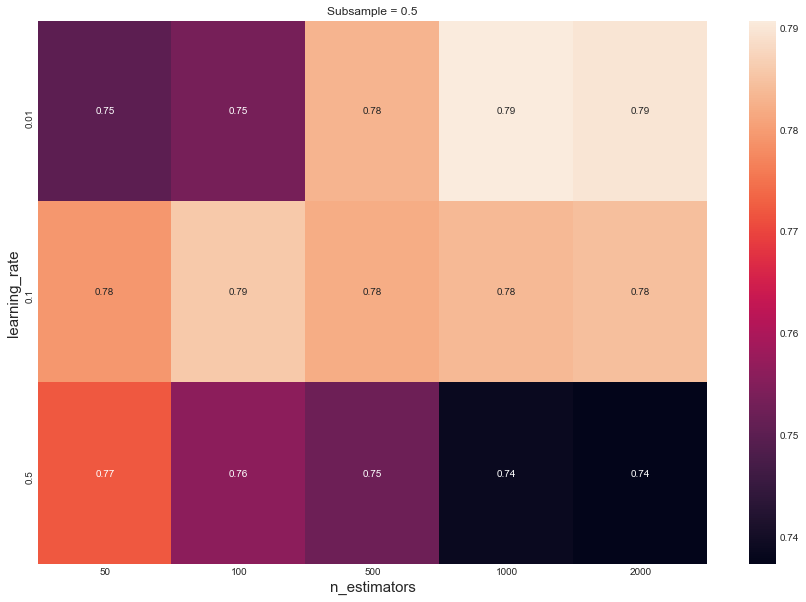

In [325]:
hm_df_d2 = hm_df.query('subsample == 0.5')
pivoted_hm_df = hm_df_d2.pivot(index='learning_rate', columns='n_estimators', values='mean_test_score')
plt.rcParams["figure.figsize"] = (15,10)
sns.heatmap(pivoted_hm_df, annot = True)
plt.title("Subsample = 0.5")

Text(0.5, 1, 'Subsample = 0.9')

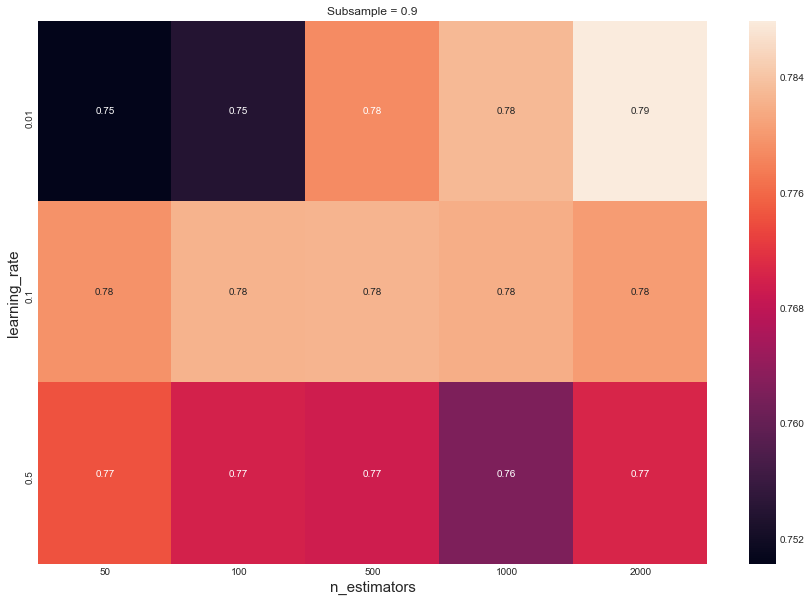

In [326]:
hm_df_d3 = hm_df.query('subsample == 0.9')
pivoted_hm_df = hm_df_d3.pivot(index='learning_rate', columns='n_estimators', values='mean_test_score')
plt.rcParams["figure.figsize"] = (15,10)
sns.heatmap(pivoted_hm_df, annot = True)
plt.title("Subsample = 0.9")

In [327]:
yhat = GB_GS.predict(X_test_std)

In [328]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      4558
           1       0.62      0.36      0.45      1453

    accuracy                           0.79      6011
   macro avg       0.72      0.64      0.66      6011
weighted avg       0.77      0.79      0.77      6011



In [329]:
GB_cr = classification_report(y_test, yhat, output_dict = True)

In [332]:
GB_AUC = round(roc_auc_score(y_test, yhat), 2)

### Comparación modelos de violencia

In [330]:
cr = [logit_cr, ada_cr, SVM_cr, RF_cr, GB_cr]
model_name = ["Regresión Logística", "AdaBoost", "SVM", "Random Forest", "Gradient Boosting", "Benchmark"]

In [334]:
accuracy = []
precision = []
recall = []
AUC = [logit_AUC, ada_AUC, SVM_AUC, RF_AUC, GB_AUC, "No aplica"]

for m in cr:
    accuracy.append(m["accuracy"])
    precision.append(m["1"]["precision"])
    recall.append(m["1"]["recall"])
        
accuracy.append(0.70)
precision.append(0.50)
recall.append(0.30)

In [335]:
m_name = pd.Series(model_name)
acc = pd.Series(accuracy).round(2)
pres = pd.Series(precision).round(2)
rec = pd.Series(recall).round(2)
auc = pd.Series(AUC)

comparison = pd.concat([m_name, acc, pres, rec, auc], axis = 1)

In [336]:
comparison.rename(columns={0:"Modelo", 1:"Accuracy", 2:"Precision", 3:"Recall", 4: "AUC"}, inplace = True)

In [337]:
comparison

,Modelo,Accuracy,Precision,Recall,AUC
0,Regresión Logística,0.78,0.56,0.44,0.67
1,AdaBoost,0.79,0.60,0.35,0.64
2,SVM,0.78,0.58,0.30,0.62
3,Random Forest,0.79,0.65,0.24,0.6
4,Gradient Boosting,0.79,0.62,0.36,0.64
5,Benchmark,0.70,0.50,0.30,No aplica


En general los modelos tuvieron un desempeño similar y por encima del benchmark en todas las métricas, a excepción de Random Forest, que quedó abajo en Recall. Si tenemos que elegir un modelo, los candidatos serían Regresión Logística (Recall/AUC) y Gradient Boosting (Accuracy/Precision).

Si consideramos que el tema de la violencia policial genera grandes problemas en la sociedad estadounidense, la prioridad podría ser lograr identificar todos los casos posibles, ante lo cual ganaría Regresión Logística por tener mayor Recall. Finalmente optamos por este modelo dado que además de tener un buen desempeño, fue el más rápido de entrenar, y por lo tanto es el más práctico en caso que quisiéramos llevarlo a producción y fuera necesario reentrenarlo de forma periódica. Esto es especialmente importante si se considera que estamos trabajando con una parte muy pequeña del dataset original.